In [106]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("../Decision tree/Company_Data.csv")
data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [81]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [82]:
data.shape

(400, 11)

In [90]:
# splitting the target Variable in to 3 parts
def split(num):
    if num < 5:
        return 'Low sale'
    elif num >= 5 and num < 10:
        return 'Average sale'
    else:
        return 'High sale'
data.Sales = data.Sales.apply(split)
print(data.Sales)

0      Average sale
1         High sale
2         High sale
3      Average sale
4          Low sale
           ...     
395       High sale
396    Average sale
397    Average sale
398    Average sale
399    Average sale
Name: Sales, Length: 400, dtype: object


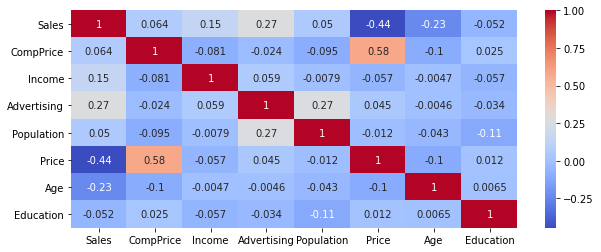

In [88]:
corr = data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

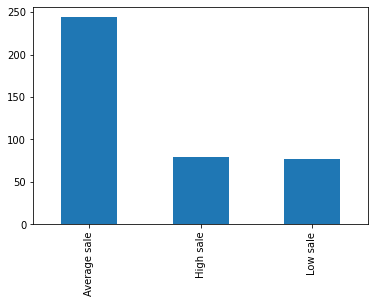

Average sale    244
High sale        79
Low sale         77
Name: Sales, dtype: int64


In [91]:
data['Sales'].value_counts(sort=True).plot.bar()
plt.show()
print(data['Sales'].value_counts())

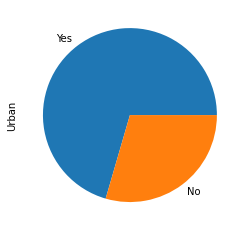

Yes    282
No     118
Name: Urban, dtype: int64


In [92]:
data['Urban'].value_counts().plot.pie()
plt.show()
print(data['Urban'].value_counts())

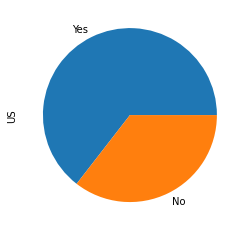

Yes    258
No     142
Name: US, dtype: int64


In [93]:
data['US'].value_counts().plot.pie()
plt.show()
print(data['US'].value_counts())

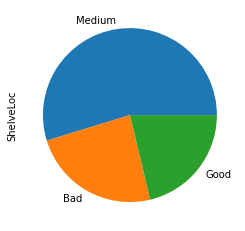

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [95]:
data['ShelveLoc'].value_counts(sort=True).plot.pie()
plt.show()
print(data['ShelveLoc'].value_counts())


In [118]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
company_data = data[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
company_data = company_data.rename(columns={'ShelveLoc':'ShelveLoc_', 'Urban':'Urban_','US':'US_'})
company_data.head()

,ShelveLoc_,Urban_,US_
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [119]:
colnames=list(company_data.columns)
colnames


['ShelveLoc_', 'Urban_', 'US_']

In [120]:
predictors = colnames[1:10]
target = colnames[0]
train,test = train_test_split(company_data,test_size = 0.2)

In [121]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
preds = model.predict(test[predictors])
pd.Series(preds).value_counts()

2    80
dtype: int64

In [127]:
pd.crosstab(test[target],preds)

col_0,2
ShelveLoc_,
0,18
1,19
2,43
